In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [33]:
seed= pd.read_csv('../Downloads/WheatSeeds-master/Wheat.csv')
seed

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetric Coeff.,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [34]:
seed.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetric Coeff.,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [35]:
seed.describe()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetric Coeff.,Length of Kernel Groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [36]:
seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of Kernel         210 non-null    float64
 4   Width of Kernel          210 non-null    float64
 5   Asymmetric Coeff.        210 non-null    float64
 6   Length of Kernel Groove  210 non-null    float64
 7   Class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [37]:
seed.shape

(210, 8)

In [38]:
seed.isna().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of Kernel           0
Width of Kernel            0
Asymmetric Coeff.          0
Length of Kernel Groove    0
Class                      0
dtype: int64

In [39]:
Y=seed['Class']
X=seed.drop(columns=['Class'])

In [40]:
seed.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of Kernel           0
Width of Kernel            0
Asymmetric Coeff.          0
Length of Kernel Groove    0
Class                      0
dtype: int64

In [41]:
seed['Class'].value_counts()

1    70
2    70
3    70
Name: Class, dtype: int64

In [42]:
X = seed.iloc[:, :-1].values
y = seed.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

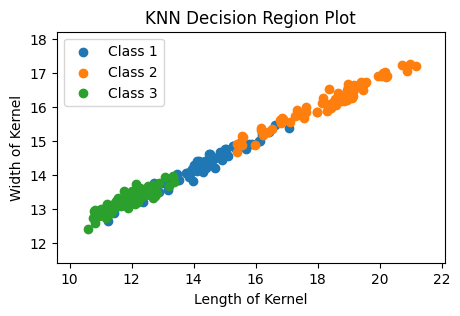

In [45]:
plt.figure(figsize=(5, 3))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label='Class %s' % label)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Length of Kernel')
plt.ylabel('Width of Kernel')
plt.legend()
plt.title('KNN Decision Region Plot')

plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [63]:
X.shape

(210, 7)

In [64]:
Y.shape

(210,)

In [65]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [66]:
model.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [67]:
model.classes_

array([1, 2, 3], dtype=int64)

In [68]:
model.predict_proba(X_test)

array([[8.08641675e-01, 5.20175829e-02, 1.39340742e-01],
       [2.66363753e-02, 8.97966770e-01, 7.53968544e-02],
       [9.34826203e-01, 2.55556637e-02, 3.96181330e-02],
       [9.07321716e-01, 7.30799174e-02, 1.95983663e-02],
       [1.71059445e-02, 8.50843758e-03, 9.74385618e-01],
       [2.55596004e-01, 7.44393017e-01, 1.09786067e-05],
       [1.26322472e-01, 8.73499501e-01, 1.78027537e-04],
       [2.09502367e-01, 7.42846614e-01, 4.76510186e-02],
       [1.52468379e-01, 8.47519678e-01, 1.19428608e-05],
       [1.18453660e-01, 2.65985617e-03, 8.78886484e-01],
       [9.54901119e-01, 2.28573779e-02, 2.22415034e-02],
       [2.85454230e-01, 2.17620162e-03, 7.12369569e-01],
       [4.64510493e-01, 1.40730441e-01, 3.94759066e-01],
       [6.98359319e-02, 2.56466730e-03, 9.27599401e-01],
       [8.12638666e-02, 9.18591984e-01, 1.44149423e-04],
       [2.44121070e-01, 7.55853225e-01, 2.57050052e-05],
       [2.57945055e-01, 5.91111658e-03, 7.36143829e-01],
       [3.84595695e-01, 6.14765

In [69]:
 model.score(X_test, y_test)

0.9285714285714286

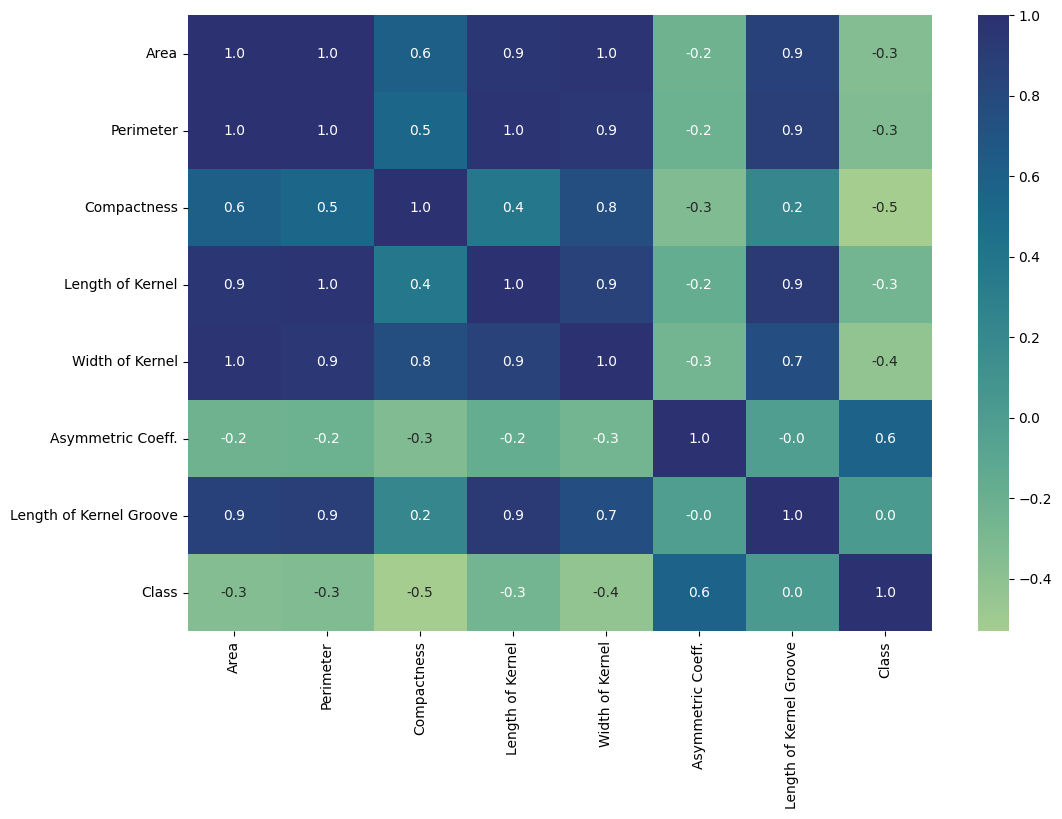

In [29]:
plt.figure(figsize=(12,8))
corr=seed.corr()
sns.heatmap(corr,annot=True,cmap="crest", fmt = ".1f")
plt.show()